# Day 4

- So far we have learned how to wrangle data and display basic summaries of our data.
    - Today we will finally look at some statistical analysis!
    - Today's lecture assumes you have familiarity with analyzing regressions.

# Lecture 4.1: Anaylyzing data

- In this lecture we will once again go through the process of importing, cleaning and merging data systematically.
    - We will take our analyses one step further and go over how to run a regression and also how to display a regression.
- **If you have any questions over the course of this lecture, please post them to the 'Day 4 Lecture Questions' assignment on the Canvas course page.**

## Import the data

- We will once again be relying on a scraper designed by Paul Boal which collects data from the [Clear Health Costs](https://clearhealthcosts.com/) website.
    - Today we will be analyzing the cost of sleep procedures in four major cities in the United States.

In [2]:
#import the sleep csv
import pandas as pd
import numpy as np
sleep = pd.read_csv('sleep.csv')
sleep

list(sleep.city.unique())

['New York', 'San Francisco', 'Miami', 'Dallas']

## A little cleaning
- Zero dollar values are not useful.

In [3]:
sleep = sleep[sleep.price != 0]


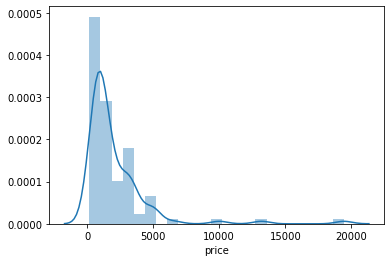

In [4]:
# import our visualization module and look at the distribution of prices

import seaborn as sns
from scipy import stats, integrate

sns.distplot(sleep.price)

## Look at the distribution by city

- San Francisco really pulls the data up, lets look with out San Francisco too.

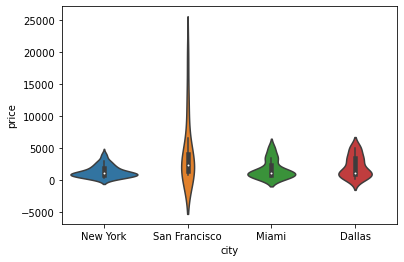

In [5]:
sns.violinplot(data=sleep, y='price', x='city')

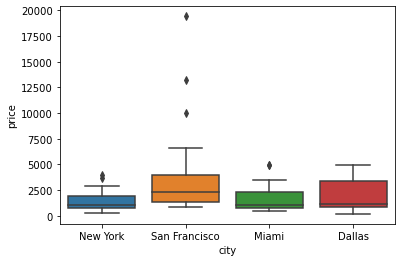

In [6]:
sns.boxplot(data=sleep, y='price', x='city') ## Dots outside the range determinde by seaborn package as outliers

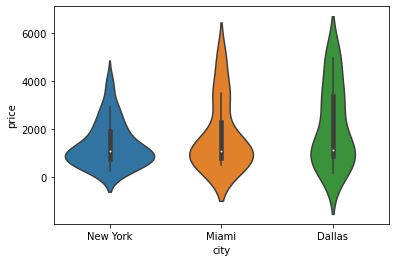

In [8]:
sns.violinplot(data=sleep[sleep.city != "San Francisco"], y='price', x='city')

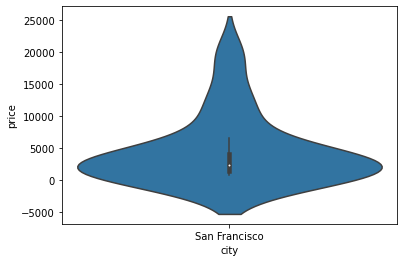

In [10]:
sns.violinplot(data=sleep[sleep.city == "San Francisco"], y='price', x='city')

## Exploring anomalies

- Now we have some astronomical prices in San Francisco
    - Let's try to figure out why by looking at our [source](https://clearhealthcosts.com/search/?query=sleep&zip_code=94016&radius=10&no_zero=1&submit=) data.
    - So given that there are notes on the three highest values, perhaps we can remove those outliers.

In [11]:
sleep[sleep.city == "San Francisco"]

,price,facility,address,condition,zip,radius,city
43,800.0,SleepMed,"4335 Mangels Blvd., Fairfield CA",sleep,94016,50,San Francisco
44,1000.0,Golden State Sleep Centers,"39055 Hastings St., Ste. 106, Fremont CA",sleep,94016,50,San Francisco
45,1140.0,California Center for Sleep Disorders,"985 Atlantic Ave., Ste. 250, Alameda CA",sleep,94016,50,San Francisco
46,1175.0,Contra Costa Sleep Center,"1455 Montego, Ste. 102, Walnut Creek CA",sleep,94016,50,San Francisco
47,1420.0,Sleep Health MD,"173 N. Morrison Ave., San Jose CA",sleep,94016,50,San Francisco
48,1575.0,Bay Sleep Clinic,"2939 Summit St., Oakland CA",sleep,94016,50,San Francisco
49,1600.0,Tri-Valley Sleep Center,"5201 Norris Canyon Rd., Ste. 120, San Ramon CA",sleep,94016,50,San Francisco
50,2250.0,Sleep Medicine and Neurology,"361 S. Monroe St., Ste. 30, San Jose CA",sleep,94016,50,San Francisco
51,2323.0,Sutter East Bay Medical Foundation,"2500 Milvia St., Berkeley CA",sleep,94016,50,San Francisco
52,3122.0,Palo Alto Medical Foundation,"795 El Camino Real, Palo Alto CA",sleep,94016,50,San Francisco


In [12]:
sleep = sleep[sleep.price != 10000]
sleep = sleep[sleep.price != 13195]
sleep = sleep[sleep.price != 19440]


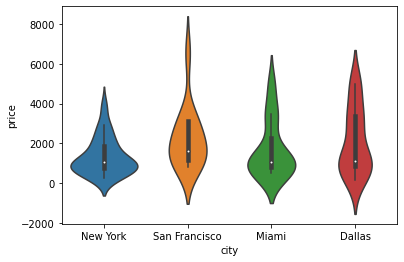

In [13]:
sns.violinplot(data=sleep, y='price', x='city')

In [ ]:
sleep[sleep.city =="New York"]

## Simple linear regression

- We know what our data looks like for price/city, but lets look at this with a regression analysis

In [14]:
# pip install this package
import statsmodels.api as smf


In [15]:
#We can do a linear regression with C() denoting that our data is categorical
lm = smf.formula.ols("price ~ C(city, Treatment(reference='New York'))", data = sleep).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.699
Date:                Sun, 07 Jun 2020   Prob (F-statistic):             0.0498
Time:                        14:25:15   Log-Likelihood:                -892.31
No. Observations:                 104   AIC:                             1793.
Df Residuals:                     100   BIC:                             1803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  1335.1395    200.332      6.665      0.000     937.687    1732.592
C(city, Treatment(reference='New York'))[T.Dallas]          784.5405    330.395      2.375      0.019     129.045    1440.036
C(city, Treatment(reference='New York'))[T.Miami]           361.2518    339.358      1.065      0.290    -312.024    1034.528
C(city, Treatment(reference='New York'))[T.San Francisco]   910.9374    415.788      2.191      0.031      86.026    1735.849
==============================================================================
Omnibus:                       19.699   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.906
Skew:                           1.124   Prob(JB):                     6.44e-06
Kurtosis:                       3.679   Cond. No.                         4.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
len(sleep)

104

In [17]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.699
Date:                Sun, 07 Jun 2020   Prob (F-statistic):             0.0498
Time:                        14:29:51   Log-Likelihood:                -892.31
No. Observations:                 104   AIC:                             1793.
Df Residuals:                     100   BIC:                             1803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [20]:
# Neat exportable results?
# run pip install stargazer
from stargazer.stargazer import Stargazer


lm_gaze = Stargazer([lm])
lm_gaze

In [22]:
lm_gaze.render_html()

'<table style="text-align:center"><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="1"><em>Dependent variable:</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td></tr><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.Dallas]</td><td>784.54<sup>**</sup></td></tr><tr><td style="text-align:left"></td><td>(330.395)</td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.Miami]</td><td>361.252<sup></sup></td></tr><tr><td style="text-align:left"></td><td>(339.358)</td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.San Francisco]</td><td>910.937<sup>**</sup></td></tr><tr><td style="text-align:left"></td><td>(415.788)</td></tr><tr><td style="text-align:left">Intercept</td><td>1335.14<sup>***</sup></td></tr><tr><td style

<table style="text-align:center"><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="1"><em>Dependent variable:</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td></tr><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.Dallas]</td><td>784.54<sup>**</sup></td></tr><tr><td style="text-align:left"></td><td>(330.395)</td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.Miami]</td><td>361.252<sup></sup></td></tr><tr><td style="text-align:left"></td><td>(339.358)</td></tr><tr><td style="text-align:left">C(city, Treatment(reference=\'New York\'))[T.San Francisco]</td><td>910.937<sup>**</sup></td></tr><tr><td style="text-align:left"></td><td>(415.788)</td></tr><tr><td style="text-align:left">Intercept</td><td>1335.14<sup>***</sup></td></tr><tr><td style="text-align:left"></td><td>(200.332)</td></tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align: left">Observations</td><td>104.0</td></tr><tr><td style="text-align: left">R<sup>2</sup></td><td>0.075</td></tr><tr><td style="text-align: left">Adjusted R<sup>2</sup></td><td>0.047</td></tr><tr><td style="text-align: left">Residual Std. Error</td><td>1313.663(df = 100.0)</td></tr><tr><td style="text-align: left">F Statistic</td><td>2.699<sup>**</sup>(df = 3.0; 100.0)</td></tr><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align: left">Note:</td>\n <td colspan="1" style="text-align: right">\n  <sup>*</sup>p&lt;0.1;\n  <sup>**</sup>p&lt;0.05;\n  <sup>***</sup>p&lt;0.01\n </td></tr></table>

In [ ]:
stargazer

In [ ]:
## Plotting our regression

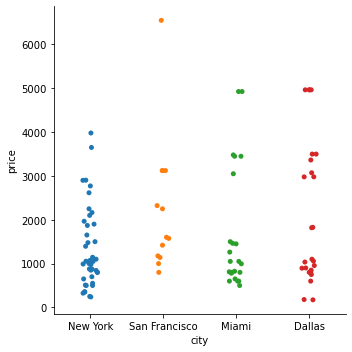

In [23]:
sns.catplot(data=sleep, x='city', y='price')